## <b> Análise exploratória </b>

A análise exploratória dos dados das API's do Google Maps Reviews e Google Maps Place Results é crucial para <b>compreender as características dos estabelecimentos presentes na plataforma</b>. Através da análise de diversos datasets, é possível obter insights valiosos sobre os horários de operação, informações gerais, opções de serviço ofertados e horários de movimento dos estabelecimentos, permitindo que nosso trabalho tenha um planejamento e organização voltado as informações de maior relevância.

Ao explorar esses dados, é possível <i>identificar tendências, padrões e correlações que podem ser usados para obter uma compreensão mais profunda das necessidades e comportamentos dos clientes em relação aos estabelecimentos e serviços que eles procuram</i>. Isso pode levar a <b>insights valiosos</b> sobre as preferências do público-alvo, concorrência, e até mesmo possíveis oportunidades de negócios e escolhas dos usuários.

Em resumo, a análise exploratória dos dados das API's do Google Maps Reviews e Google Maps Place Results, com bibliotecas de gráficos e mapas, é <b>fundamental para o entendimento geral do problema e identificação dos principais pontos a serem utilizados na modelagem, dashboard e até API</b>.


### Bibliotecas 

In [ ]:
import pandas as pd
import plotly.express as px
import folium
import plotly.graph_objs as go
import re
pd.set_option('display.max_columns', 30) # mostrar todas as colunas no terminal

### Importando dataframes

In [ ]:
# dataset sobre horários de operação de diversos estabelecimentos
df_op = pd.read_csv('df_operating_hours.csv', sep=',')

In [ ]:
df_op.head()

,title,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,Closed
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm


In [ ]:
# dataset sobre informações gerais de diversos estabelecimentos
df_ov = pd.read_csv('df_overview.csv', sep=',')

In [ ]:
df_ov.head()

,position,title,place_id,data_id,data_cid,rating,reviews,price,type,address,latitude,longitude,open_state,description,thumbnail
0,1,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,0x94ce5393313c4d53:0xb45e97dbf6c3aa6,812312034101967526,4.6,14.0,NaN,Restaurant,"Estr. do Campo Limpo, 992 - Vila Prel, São Pau...",-23.647919,-46.762998,Open ⋅ Closes 8 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipO1TL...
1,2,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,0x94ce5e6585b58553:0xd940c7253819b56f,15654731267408770415,4.6,17.0,NaN,Restaurant,"Rua Coronel Marques, 399 - Vila Nova Mancheste...",-23.543091,-46.545526,Opens soon ⋅ 11:30 am,NaN,https://streetviewpixels-pa.googleapis.com/v1/...
2,3,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,0x94c58a8e0adfb785:0x46f3aeddca51bd11,5112622269601004817,4.5,881.0,£,Buffet restaurant,"Av. Prof. Arthur Fonseca, 841 - Jardim Faculda...",-23.515907,-47.463541,Open ⋅ Closes 2:30 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipP11R...
3,4,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,0x94cef8ee5c12f5cd:0xeff7c9551c8c1587,17291510661700654471,4.5,201.0,NaN,Buffet restaurant,"R. Conselheiro Ribas, 330 - Vila Anastácio, Sã...",-23.514702,-46.720743,Closed ⋅ Opens 11 am Mon,NaN,https://lh5.googleusercontent.com/p/AF1QipOzyq...
4,5,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,0x94ce56ecb93b9a47:0xf86e7281c3fed2e0,17901371470508905184,4.5,26.0,NaN,Restaurant,"Rua Dr. SÍlvio Dante Bertacchi, 253 - Vila Son...",-23.596165,-46.729929,Open ⋅ Closes 10 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipMMLu...


In [ ]:
# dataset sobre opções de serviço ofertados de diversos estabelecimentos
df_so = pd.read_csv('df_service_options.csv', sep=',')

In [ ]:
df_so.head()

,title,place_id,dine_in,takeout,delivery,drive_through
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,True,True,False,False
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,True,True,True,False
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,True,True,False,False
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,True,True,True,False
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,True,True,False,False


In [ ]:
# dataset sobre horários de movimento de diversos estabelecimentos
df_hm = pd.read_csv('horarios_movimento.csv', sep=',')

In [ ]:
df_hm.head()

,sunday,monday,tuesday,wednesday,thursday,friday,saturday,title
0,"{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
1,"{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
2,"{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
3,"{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
4,"{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...",Por um Punhado de Dólares


In [ ]:
# dataset sobre estabelecimentos relacionados com informações gerais
df_tp = pd.read_csv('tambem_procuram.csv', sep=',')

In [ ]:
df_tp.head()

,estabelecimento_referencia,position,title,rating,reviews,type,thumbnail,latitude,longitude
0,Por um Punhado de Dólares,1,YERBA + Por um Punhado de Dólares,4.8,931,"['Coffee shop', 'Bar', 'Book store', 'Pub', 'R...",https://lh5.googleusercontent.com/p/AF1QipO7UG...,-23.534373,-46.652746
1,Por um Punhado de Dólares,2,Urbe Cafe Bar,4.5,5879,"['Coffee store', 'Bar', 'Brunch', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipOGuR...,-23.555976,-46.658378
2,Por um Punhado de Dólares,3,KOF - King of The Fork,4.5,1945,"['Coffee store', 'Breakfast', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipMeeB...,-23.564052,-46.683767
3,Por um Punhado de Dólares,4,Café Girondino,4.5,6548,"['Cafe', 'Breakfast', 'Cafeteria', 'Cocktail b...",https://lh5.googleusercontent.com/p/AF1QipO9py...,-23.544683,-46.634228
4,Por um Punhado de Dólares,5,Barões do Cafe,4.1,122,['Coffee shop'],https://lh5.googleusercontent.com/p/AF1QipMT6j...,-23.557180,-46.663046


### Organizando datasets

In [ ]:
# juntando os dataset que contem a coluna "place_id" para termos as informações de estabelecimentos em um único lugar
df_junto = pd.merge(df_op, df_ov, on='place_id', how='outer')
df_estabelecimentos = pd.merge(df_junto, df_so, on='place_id', how='outer')

In [ ]:
df_estabelecimentos = df_estabelecimentos.drop(['title_x', 'title_y'], axis=1)
df_estabelecimentos.head()

,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,position,data_id,data_cid,rating,reviews,price,type,address,latitude,longitude,open_state,description,thumbnail,title,dine_in,takeout,delivery,drive_through
0,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,1,0x94ce5393313c4d53:0xb45e97dbf6c3aa6,812312034101967526,4.6,14.0,NaN,Restaurant,"Estr. do Campo Limpo, 992 - Vila Prel, São Pau...",-23.647919,-46.762998,Open ⋅ Closes 8 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipO1TL...,Sagrado Almoço,True,True,False,False
1,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,2,0x94ce5e6585b58553:0xd940c7253819b56f,15654731267408770415,4.6,17.0,NaN,Restaurant,"Rua Coronel Marques, 399 - Vila Nova Mancheste...",-23.543091,-46.545526,Opens soon ⋅ 11:30 am,NaN,https://streetviewpixels-pa.googleapis.com/v1/...,2 L's Restaurante E Bar Almoço-Lanches,True,True,True,False
2,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,3,0x94c58a8e0adfb785:0x46f3aeddca51bd11,5112622269601004817,4.5,881.0,£,Buffet restaurant,"Av. Prof. Arthur Fonseca, 841 - Jardim Faculda...",-23.515907,-47.463541,Open ⋅ Closes 2:30 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipP11R...,Brasiliano Restaurante,True,True,False,False
3,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,Closed,4,0x94cef8ee5c12f5cd:0xeff7c9551c8c1587,17291510661700654471,4.5,201.0,NaN,Buffet restaurant,"R. Conselheiro Ribas, 330 - Vila Anastácio, Sã...",-23.514702,-46.720743,Closed ⋅ Opens 11 am Mon,NaN,https://lh5.googleusercontent.com/p/AF1QipOzyq...,Sirva-se Almoço,True,True,True,False
4,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,5,0x94ce56ecb93b9a47:0xf86e7281c3fed2e0,17901371470508905184,4.5,26.0,NaN,Restaurant,"Rua Dr. SÍlvio Dante Bertacchi, 253 - Vila Son...",-23.596165,-46.729929,Open ⋅ Closes 10 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipMMLu...,Speed Almoço,True,True,False,False


In [ ]:
# df_estabelecimentos.to_csv('info_estabelecimentos.csv', index=False)

### Analisando dados e informações

#### Dataset informações gerais do estabelecimento 

In [ ]:
# Plotar um histograma da coluna 'rating'
fig = go.Figure(
    [go.Histogram(
        x=df_estabelecimentos['rating'],
        nbinsx=10
    )])

fig.update_layout(
    title='Distribuição da Classificação Média dos Locais',
    xaxis_title='Classificação Média',
    yaxis_title='Frequência')

fig.show()

O histograma mostra que a maioria dos locais tem uma classificação média entre 4.3 e 4.7, o que indica que a qualidade dos locais é geralmente bem avaliada pelos clientes. Há também uma pequena quantidade de locais com classificação média abaixo de 3.7, o que indica que temos em nossa base poucos estabelecimentos com problemas de qualidade.

In [ ]:
# converte os dias da semana para uma lista
dias_da_semana = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

# cria um dicionário para armazenar a soma da quantidade de restaurantes abertos por dia da semana
quantidade_por_dia = {}
for dia in dias_da_semana:
    quantidade_por_dia[dia] = len(df_estabelecimentos[df_estabelecimentos[dia] != 'Closed'])

# cria o gráfico de barras
fig = go.Figure(
    [go.Bar(
        x=dias_da_semana,
        y=list(quantidade_por_dia.values())
    )])

fig.update_layout(
    title='Quantidade de Estabelecimentos Abertos por Dia da Semana',
    xaxis_title='Dia da Semana',
    yaxis_title='Quantidade de Estabelecimentos',
    xaxis_tickangle=--30)

fig.show()

O gráfico de barras mostra a quantidade de estabelecimentos abertos por dia da semana, revelando que quarta-feira, quinta-feira e sexta-feira são os dias em que a maioria dos estabelecimentos estão abertos, enquanto domingo é o dia em que menos estabelecimentos estão abertos, provavelmente para descanso dos funcionários, ou ainda, para reduzir custos com energia elétrica e outros gastos fixos pelo menor movimento em comparação aos outros dias. Isso pode ser útil para ajudar a planejar atividades de alimentação fora de casa e para entender melhor os hábitos dos estabelecimentos.

In [ ]:
# Agrupar por categoria e contar a quantidade de ocorrências
frequencia_tipo = df_estabelecimentos.groupby('type').size().reset_index(name='quantidade')

# Ordenar em ordem decrescente pela quantidade
frequencia_tipo = frequencia_tipo.sort_values(by='quantidade', ascending=False)

# Selecionar apenas as 5 categorias com maior frequência
top_10 = frequencia_tipo.iloc[:10]

# Criar o gráfico de barras
fig = px.bar(top_10, x='type', y='quantidade', color='type')

# Configurar o layout do gráfico
fig.update_layout(title='Top 10 Categorias de Restaurantes', xaxis_title='Categoria', yaxis_title='Quantidade')

# Exibir o gráfico
fig.show()

In [ ]:
# Selecionar os tipos de estabelecimentos a serem analisados
tipos_selecionados = ['Restaurant', 'Bar', 'Pizza restaurant', 'Snack bar', 'Fast food restaurant']

# Criar um dicionário para armazenar a quantidade de estabelecimentos abertos por dia da semana para cada tipo
dados_por_tipo = {}
for tipo in tipos_selecionados:
    df_tipo = df_estabelecimentos[df_estabelecimentos['type'] == tipo]
    quantidade_por_dia = {}
    for dia in dias_da_semana:
        quantidade_por_dia[dia] = len(df_tipo[df_tipo[dia] != 'Closed'])
    dados_por_tipo[tipo] = quantidade_por_dia

# Criar o gráfico de barras empilhadas
fig = go.Figure()
for tipo in tipos_selecionados:
    fig.add_trace(go.Bar(
        x=dias_da_semana,
        y=list(dados_por_tipo[tipo].values()),
        name=tipo
    ))

fig.update_layout(
    title='Quantidade de Estabelecimentos Abertos por Dia da Semana',
    xaxis_title='Dia da Semana',
    yaxis_title='Quantidade de Estabelecimentos',
    barmode='stack',
    xaxis_tickangle=-30
)

fig.show()

Para analisar melhor a abertura dos estabelecimentos por categoria, vemos nesse primeiro gráfico de barras as top 10 categorias que mais possuem estabelecimentos cadastrados no nosso dataset, entre els restaurantes, bar, pizzaria, snack bar, fast food, hamburgueria, sorveteria, restaurante italiano, buffet e padaria. Levando em conta as 5 top categorias podemos observar que a maioria dos restaurantes abre às quintas-feiras e que os domingos são os dias com menos estabelecimentos abertos. Já para bares, a maior quantidade de estabelecimentos abertos é aos sábados, enquanto as segundas-feiras possuem a menor quantidade. Nas pizzarias, sábados também são o dia com mais estabelecimentos abertos e as segundas-feiras possuem a menor quantidade. Para os snack bars, quintas-feiras têm a maior quantidade de estabelecimentos abertos e as segundas-feiras possuem a menor quantidade. Por fim, fast foods têm a maior quantidade de estabelecimentos abertos às quintas-feiras e a menor quantidade aos domingos.

Esses resultados podem ser explicados por ser comum que as pessoas saiam para jantar ou beber em bares e restaurantes às quintas-feiras, após um dia de trabalho, enquanto nos domingos muitas pessoas preferem ficar em casa com a família. Já aos sábados, pode haver maior procura por estabelecimentos de entretenimento noturno, o que explicaria a maior quantidade de bares e pizzarias abertas neste dia. Em geral, essas informações podem ser úteis para os proprietários desses estabelecimentos, permitindo que eles possam otimizar seus horários de funcionamento para atender melhor à demanda de seus clientes. 

In [ ]:
# calcula a frequência de cada serviço
freq_servicos = df_estabelecimentos[['dine_in', 'takeout', 'delivery', 'drive_through']].sum()

# cria o gráfico de pizza com a frequência de cada serviço
fig = go.Figure(
    go.Pie(
        labels=freq_servicos.index.tolist(),
        values=freq_servicos.values.tolist(),
        hole=0.4,
        textposition='inside',
        textinfo='percent+label'
    ))

fig.update_layout(
    title='Disponibilidade de Serviços nos Locais',)

fig.show()

Podemos observar que a maioria dos estabelecimentos disponibilizam o serviço de "dine in" (46,6%), seguido do serviço "takeout" (41,9%). O serviço de "delivery" é oferecido em apenas 10,1% dos locais e o serviço de "drive through" é o menos comum, disponível em somente 1,36% dos estabelecimentos. Essas informações podem ser úteis para entender as preferências dos consumidores e ajudar os empreendedores a decidir quais serviços oferecer em seus estabelecimentos

In [ ]:
# selecionar as colunas de interesse
df_servicos = df_estabelecimentos[['type', 'dine_in', 'takeout', 'delivery', 'drive_through']]

# agrupar por tipo de estabelecimento e calcular a frequência de cada serviço
freq_servicos_por_tipo = df_servicos.groupby('type').sum()

# calcular a porcentagem de cada serviço para cada tipo de estabelecimento
porcentagem_servicos_por_tipo = (freq_servicos_por_tipo.div(freq_servicos_por_tipo.sum(axis=1), axis=0) * 100).round(2)

# mostrar a tabela de porcentagem de serviços por tipo de estabelecimento
print(porcentagem_servicos_por_tipo)

                              dine_in  takeout  delivery  drive_through
type                                                                   
Adult entertainment club          NaN      NaN       NaN            NaN
Advertising agency                NaN      NaN       NaN            NaN
African restaurant              50.00    50.00      0.00            0.0
American restaurant             43.48    34.78     13.04            8.7
Andalusian restaurant          100.00     0.00      0.00            0.0
...                               ...      ...       ...            ...
Wine store                      33.33    33.33     33.33            0.0
Wine wholesaler and importer    50.00     0.00     50.00            0.0
Yakisoba Restaurant             50.00    50.00      0.00            0.0
Yakitori restaurant             50.00    50.00      0.00            0.0
Zoo                               NaN      NaN       NaN            NaN

[327 rows x 4 columns]


Agora exploramos mais a porcentagem presença de cada tipo de restaurante em cada segmento, e é notável que dine in e takeout são muito presentes na maioria das categorias, principalmente aquelas que envolvem restaurantes e lojas ao contrário de delivery e drive through que se concentram em segmentos mais de fast food, comida americana e lojas de bebidas 

In [ ]:
# Contar valores nulos e não nulos na coluna de descrição
print(df_estabelecimentos['description'].isnull().value_counts())

True     7681
False    2319
Name: description, dtype: int64


A grande maioria dos estabelecimentos (aproximadamente 76,81%) não possui descrição disponível nessa coluna. Já os outros 23,19% possuem algum tipo de descrição cadastrada. É importante considerar que a falta de descrição pode dificultar a busca e seleção de estabelecimentos pelos clientes, além de limitar a informação disponível para análise.

In [ ]:
# Contar valores nulos e não nulos na coluna de endereço
print(df_estabelecimentos['address'].isnull().value_counts())

False    9936
True       64
Name: address, dtype: int64


A grande maioria dos estabelecimentos (99,36%) possui informações de endereço preenchidas, enquanto apenas 0,64% dos estabelecimentos (0,64%) não possuem essa informação. Podemos pensar que essa minoria que não possui endereço sejam estabelecimentos online que não possuem nenhum tipo de endereço físico.

In [ ]:
df_estabelecimentos = df_estabelecimentos.dropna(subset=['latitude', 'longitude'])

# Criar um mapa com a localização dos locais
mapa = folium.Map(location=[df_estabelecimentos['latitude'].mean(), df_estabelecimentos['longitude'].mean()], zoom_start=12)

for i, row in df_estabelecimentos.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(mapa)

# Exibir o mapa
mapa

Mapa com todos os estabelecimentos e suas localizações para explorar regiões e estabelecimentos pelo mapa de São Paulo

#### Dataset sobre os horários de movimento

Ajustando dataset para ter somente o valor do busyness_score de cada restaurante com seu nome

In [ ]:
# Selecionar as colunas desejadas
colunas_dias_semana = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
df_dias_semana = df_hm[colunas_dias_semana]

# Definir a função para extrair o valor do busyness_score
def extrair_score(coluna):
    # Extrair o valor usando regex
    match = re.search("'busyness_score':\s*(\d+)", str(coluna))
    if match:
        return match.group(1)
    else:
        return None

# Aplicar a função a todas as colunas selecionadas
df_dds = df_dias_semana.apply(lambda x: x.apply(extrair_score))

# Concatenar as colunas em um novo dataframe
df_final = pd.concat([df_hm['title'], df_dds], axis=1)

# Exibir o resultado
df_final

,title,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,Por um Punhado de Dólares,0,0,0,0,0,0,0
1,Por um Punhado de Dólares,0,0,0,0,0,0,0
2,Por um Punhado de Dólares,0,0,0,0,0,0,0
3,Por um Punhado de Dólares,0,0,0,0,0,0,0
4,Por um Punhado de Dólares,27,39,29,34,34,31,29
...,...,...,...,...,...,...,...,...
5399,Emporio Akkar,None,0,0,0,0,0,0
5400,Emporio Akkar,None,0,0,0,0,0,0
5401,Emporio Akkar,None,0,0,0,0,0,0
5402,Emporio Akkar,None,0,0,0,0,0,0


In [ ]:
# Selecionar apenas as linhas com valores acima de zero e não nulos
df_filtrado = df_final.loc[(df_final[colunas_dias_semana].astype(float) > 0).any(axis=1) & df_final[colunas_dias_semana].notnull().all(axis=1)]

# Exibir o resultado
df_filtrado.head()

,title,sunday,monday,tuesday,wednesday,thursday,friday,saturday
4,Por um Punhado de Dólares,27,39,29,34,34,31,29
5,Por um Punhado de Dólares,45,51,44,48,51,44,47
6,Por um Punhado de Dólares,64,63,58,60,69,55,65
7,Por um Punhado de Dólares,80,72,70,69,81,63,77
8,Por um Punhado de Dólares,90,78,76,72,81,65,86


#### Dataset sobre relações entre estabelecimentos

In [ ]:
df_tp

,estabelecimento_referencia,position,title,rating,reviews,type,thumbnail,latitude,longitude
0,Por um Punhado de Dólares,1,YERBA + Por um Punhado de Dólares,4.8,931,"['Coffee shop', 'Bar', 'Book store', 'Pub', 'R...",https://lh5.googleusercontent.com/p/AF1QipO7UG...,-23.534373,-46.652746
1,Por um Punhado de Dólares,2,Urbe Cafe Bar,4.5,5879,"['Coffee store', 'Bar', 'Brunch', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipOGuR...,-23.555976,-46.658378
2,Por um Punhado de Dólares,3,KOF - King of The Fork,4.5,1945,"['Coffee store', 'Breakfast', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipMeeB...,-23.564052,-46.683767
3,Por um Punhado de Dólares,4,Café Girondino,4.5,6548,"['Cafe', 'Breakfast', 'Cafeteria', 'Cocktail b...",https://lh5.googleusercontent.com/p/AF1QipO9py...,-23.544683,-46.634228
4,Por um Punhado de Dólares,5,Barões do Cafe,4.1,122,['Coffee shop'],https://lh5.googleusercontent.com/p/AF1QipMT6j...,-23.557180,-46.663046
...,...,...,...,...,...,...,...,...,...
1834,Emporio Akkar,1,Empório Syrio,4.6,428,"['Gourmet grocery store', 'Market']",https://lh5.googleusercontent.com/p/AF1QipNV1X...,-23.543061,-46.631866
1835,Emporio Akkar,2,Tio Ali Empório Árabe,4.8,33,['Gourmet grocery store'],https://lh5.googleusercontent.com/p/AF1QipMPFT...,-23.541785,-46.629380
1836,Emporio Akkar,3,Maxifour Lebanon Market Center - Empório Árabe,4.4,1155,"['Gourmet grocery store', 'Condiments supplier...",https://lh5.googleusercontent.com/p/AF1QipNz6S...,-23.613913,-46.658768
1837,Emporio Akkar,4,Raful Cozinha Árabe - 25 de Março,4.6,7929,"['Middle Eastern', 'Sfiha restaurant']",https://lh5.googleusercontent.com/p/AF1QipOEhq...,-23.543192,-46.631870


Você pode usar esse dataset, para filtrar restaurante e achar suas similaridades com os outros estabelecimentos.

## <b> Modelo de NPL com Análise de sentimento </b> 

O modelo de NLP (Processamento de Linguagem Natural) que analisa os sentimentos das avaliações de diversos estabelecimentos é uma técnica de análise de dados que utiliza algoritmos de aprendizado de máquina para compreender o tom e o contexto das avaliações deixadas pelos clientes na plataforma do Google.

Ao analisar as avaliações dos clientes, o modelo de NLP pode identificar tendências e padrões nos sentimentos expressos pelos clientes, permitindo que as empresas e usuários obtenham insights valiosos sobre o desempenho de seus estabelecimentos e serviços.

Em resumo, o modelo de NLP que analisa os sentimentos das avaliações de diversos estabelecimentos é uma técnica poderosa de análise de dados que pode fornecer informações valiosas, em nosso caso mais para clientes que podem utilizar das análises para observar a verdadeira opinião além das notas/estrelas, comparadas também a categorias e avaliações.

### Bibliotecas

In [105]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from numba import jit, prange, njit
import time
# from deep_translator import GoogleTranslator, single_detection

from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer

# download de stopwords de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Pré Processamento
Antes de analisar os sentimentos de cada restaurante, devemos filtrar e limpar os datasets que iremos usar

In [98]:
#Limpeza de dados
df = pd.read_csv('most_relevant_reviews.csv',sep = ',', usecols=['title', 'place_id', 'username', 'rating', 'description', 'date'])
df

,title,place_id,username,rating,description,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4331,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,André Marques,5,NaN,a month ago
4332,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Richard Lucas,4,NaN,7 months ago
4333,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Iago Vilas Boas,4,NaN,2 months ago
4334,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Denis Balduino,5,NaN,3 weeks ago


In [99]:
#Organizar o dataset 
df = df.rename(columns={"title":"restaurante"})
df = df.rename(columns={"description":"comentario"})
df = df.dropna().reset_index(drop=True)
df

,restaurante,place_id,username,rating,comentario,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4224,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Balatonfüredi Dávid,5,Best pastel in town! O maior é mais recheado!...,3 months ago
4225,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,João Carlos Sousa,5,"Simpática e prestativa, Rose faz pastéis na ho...",7 months ago
4226,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Isabela Pontes,5,"Meu deus, o pastel é sensaaacional se bom. Mas...",9 months ago
4227,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Henrique Costa (Silva),5,Sem duvidas o melhor pastel da cidade!! Além d...,a year ago


In [100]:
# traduzindo dados para inglês, usando computação paralela
@jit(parallel=True)
def traduzir_comentarios(comentarios):
  translated_list = []
  my_translator = GoogleTranslator(source='auto', target='english')

  for c in prange(len(comentarios)):
    result = my_translator.translate(text=str(comentarios[c]))
    translated_list.append(result)  
  return translated_list

In [106]:
tempo_inicial = time.time()
df['comentario'] = traduzir_comentarios(df.comentario.values)
tempo_final = time.time()
print(f"A duração da tradução foi de {tempo_final - tempo_inicial} segundos")

A duração da tradução foi de 13 segundos


In [ ]:
#salvando no csv
df.to_csv('most_relevant_reviews_translated.csv', index=False)

### Remover os stopwords

In [73]:
df = pd.read_csv('most_relevant_reviews_translated.csv',sep=',')
df

,restaurante,place_id,username,rating,comentario,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4224,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Balatonfüredi Dávid,5,Best pastel in town! The bigger one is more st...,3 months ago
4225,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,João Carlos Sousa,5,"Friendly and helpful, Rose makes pastries on t...",7 months ago
4226,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Isabela Pontes,5,"My god, the pastel is sensational if good. Dry...",9 months ago
4227,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Henrique Costa (Silva),5,Without a doubt the best pastel in town!! In a...,a year ago


In [74]:
# Criando DataFrames vazios para armazenar pontuações de polaridade de sentimento e frequencias de palavras
sentimento_df = pd.DataFrame(columns=['restaurante', 'comentario', 'polaridade'])
freq_df = pd.DataFrame(columns=['restaurante', 'palavra', 'frequencia'])

In [75]:
# Para cada avaliação de restaurante, análisamos a polaridade de sentimentos e a estatísticas de frequência de palavras
for restaurante in df['restaurante'].unique():
    reviews = df.loc[df['restaurante'] == restaurante, 'comentario']
    
    words = []
    # analise de sentimento
    for comentario in reviews:
        # Tokenização de texto e exclusão de stopword
        review_str = str(comentario)
        tokens = nltk.word_tokenize(review_str.lower())

        # calculando polaridade
        blob = TextBlob(' '.join(tokens))
        polaridade = blob.sentiment.polarity
        
        # Adicionando pontuações de polaridade de sentimento no DataFrame "sentimento_df"
        sentimento_df = sentimento_df.append({
            'restaurante': restaurante,
            'comentario': comentario,
            'polaridade': polaridade
        }, ignore_index=True)

        #estrutura de repetição para exclusão de stopwords em portugues e ingles
        linguagens = ['english', 'portuguese']
        tokens_freq = tokens.copy()
        for l in linguagens:
            tokens_freq = [t for t in tokens_freq if t.isalpha() and t not in stopwords.words(l)]
        
        words += tokens_freq
    
    freq_dist = nltk.FreqDist(words)
    
    # Adicionando pontuações de polaridade de sentimento no DataFrame "freq_df"
    for palavra, frequencia in freq_dist.items():
        freq_df = freq_df.append({
            'restaurante': restaurante,
            'palavra': palavra,
            'frequencia': frequencia
        }, ignore_index=True)

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [76]:
sentimento_df['rating']=df['rating']
sentimento_df['place_id']=df['place_id']
sentimento_df

,restaurante,comentario,polaridade,rating,place_id
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA
...,...,...,...,...,...
4224,Pastel da Rose,Best pastel in town! The bigger one is more st...,0.562500,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4225,Pastel da Rose,"Friendly and helpful, Rose makes pastries on t...",0.458273,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4226,Pastel da Rose,"My god, the pastel is sensational if good. Dry...",0.469444,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4227,Pastel da Rose,Without a doubt the best pastel in town!! In a...,0.603704,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE


In [77]:
#Criar a função para idetificar se a polaridade é positivo, neutro ou negativo
def polaridade(nota):
    if nota > 0:
        return (1, 'Positivo')
    elif nota < 0:
        return (-1, 'Negativo')
    else:
        return (0, 'Neutro')
    
# Adicionar tanto a polaridade em número quanto em texto em uma nova coluna
sentimento_df[['polaridade_num', 'polaridade_texto']] = sentimento_df['polaridade'].apply(polaridade).apply(pd.Series)
sentimento_df

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
...,...,...,...,...,...,...,...
4224,Pastel da Rose,Best pastel in town! The bigger one is more st...,0.562500,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4225,Pastel da Rose,"Friendly and helpful, Rose makes pastries on t...",0.458273,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4226,Pastel da Rose,"My god, the pastel is sensational if good. Dry...",0.469444,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4227,Pastel da Rose,Without a doubt the best pastel in town!! In a...,0.603704,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo


In [ ]:
# Salvando pontuações de polaridade de sentimento e frequências de palavras para um arquivo CSV
sentimento_df.to_csv('restaurant_polaridade.csv', index=False)
freq_df.to_csv('restaurant_word_freq.csv', index=False)

### Análise de sentimento

In [78]:
sent_restaurante = sentimento_df.copy()
sent_restaurante.head()

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo


In [79]:
#melhores restaurantes por meio de analise de sentimento 
top_ratings = sent_restaurante.sort_values(['polaridade','rating'], ascending=False)
top_ratings[:]

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
62,Café Sol,Went there for coffee and a dessert. Everythin...,1.0,5,ChIJKY73HalZzpQR1ZE9JE8dzS0,1,Positivo
68,Um Coffee Co.,Awesome!!,1.0,5,ChIJgY-iHWZYzpQRUQ1dHiOh1IU,1,Positivo
79,Um Coffee Co.,Great service and coffee!,1.0,5,ChIJy_Nx8yVazpQRfS3c9meKjik,1,Positivo
155,Starbucks,Great service! And a delicious brigadeiro frap...,1.0,5,ChIJYdxZ6Z1XzpQRF6a4w5mWwzg,1,Positivo
177,the little coffee shop . CAFÉ ESPECIAL & CURSO...,"One of the best in São Paulo, no doubt. Great ...",1.0,5,ChIJLZAxhsdZzpQRqTokkP9PAKg,1,Positivo
...,...,...,...,...,...,...,...
3612,Bolo da Madre,"I had a terrible experience, my order was canc...",-1.0,5,ChIJMxUQOZtbzpQRMFfnopTnW0M,-1,Negativo
3932,Fábrica de Bolo Vó Alzira Bangu,"I bought a passion fruit cake, through Ifood, ...",-1.0,5,ChIJm2OcUOtYzpQRvQ0lNNaEdYQ,-1,Negativo
151,Starbucks,Terrible service.\nHad an argument with one of...,-1.0,4,ChIJgX_VHYNXzpQRBVLomhGDEjk,-1,Negativo
2577,Confeitaria e Panificadora Doce Belo,Just horrible this owner treats others as if t...,-1.0,4,ChIJecU9gcDNyJQRdLbIg_1Jeus,-1,Negativo


In [80]:
#Se estivermos preocupados com as avaliações totais de sentimento de diferentes restaurantes, podemos primeiro olhar para a média dessas avaliações do restaurante, aqui usamos o método pivot_table:
mean_ratings = sent_restaurante.pivot_table(values=['polaridade','rating'], index='restaurante',aggfunc='mean')
mean_ratings[:5]

,polaridade,rating
restaurante,,
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos,0.588156,4.375
89ºC Coffee Station,0.409069,4.000
@ Zona Norte,0.918333,3.500
A Baianeira,0.493646,4.625
A Bolaria,0.769018,5.000


In [81]:
#Vendo  estatísticas de cada restaurante e o número de votantes:
ratings_by_place = sent_restaurante.groupby('restaurante').size()
ratings_by_place[:10]

restaurante
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos    8
89ºC Coffee Station                                                                                                              8
@ Zona Norte                                                                                                                     2
A Baianeira                                                                                                                      8
A Bolaria                                                                                                                        7
A Casa do Porco Bar                                                                                                              8
A Creperia                                                                                                                       8
A Douceur Doces Finos                                                  

In [82]:
#Se o número de votantes for muito baixo, então esses dados não são objetivos, vamos selecionar restaurantes com mais de 4 votantes:
active_place = ratings_by_place.index[ratings_by_place >= 5]
active_place

Index([''Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos',
       '89ºC Coffee Station', 'A Baianeira', 'A Bolaria',
       'A Casa do Porco Bar', 'A Creperia',
       'A Imperatriz • Casa de Chá - Presentes - Terapias',
       'A Quinta do Marquês- Xodó Paulista',
       'A Refinaria Gourmet Unidade Vila Leopoldina',
       'ALTO DA MOOCA PÃES E DOCES',
       ...
       'YERBA + Por um Punhado de Dólares', 'ZUD Café', 'Zeu's Hot Dog',
       'Ziriguidum Bar', 'boteco Tamandaré', 'café paris', 'café zinn',
       'padaria', 'quilinho',
       'the little coffee shop . CAFÉ ESPECIAL & CURSOS . Delivery/retiradas agendadas, e workshop online p/ quem quer empreender.'],
      dtype='object', name='restaurante', length=492)

In [83]:
#media de ratings
mean_ratings = mean_ratings.loc[active_place]
mean_ratings

,polaridade,rating
restaurante,,
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos,0.588156,4.375
89ºC Coffee Station,0.409069,4.000
A Baianeira,0.493646,4.625
A Bolaria,0.769018,5.000
A Casa do Porco Bar,0.508805,4.750
...,...,...
café paris,0.427439,4.625
café zinn,0.362548,4.125
padaria,0.440074,4.000


In [84]:
#ordenando os 10 primeiros restaurantes por meio de rating
top_ratings = mean_ratings.sort_values(by='rating', ascending=False)
top_ratings[:10]

,polaridade,rating
restaurante,,
Pastel da Rose,0.508400,5.0
Spoleto,-0.061226,5.0
Nó 8 Café,0.401394,5.0
Brothaus Breads & Pastries,0.373607,5.0
Oggi Sorvetes,0.662490,5.0
Oggi Sorvetes - Vila Guarani,0.541944,5.0
Padaria Bella Paulista,0.325796,5.0
Padaria Brasileira,0.338835,5.0
Bar do Nico,0.489397,5.0


In [85]:
#ordenando os 10 primeiros restaurantes por meio de média de polaridade
top_ratings = mean_ratings.sort_values(by='polaridade', ascending=False)
top_ratings[:10]

,polaridade,rating
restaurante,,
A Bolaria,0.769018,5.000
Cafeteria São Paulo,0.742917,4.250
Tetê Confectionery Gelateria Cafe,0.724749,4.000
Farsoun Comida e Doces Árabe Sirio,0.718557,4.875
Actual - Máquinas De Café em São Paulo - Venda e Locação Máquinas de Café,0.703125,5.000
Abarista Cafés,0.693690,4.000
Do Digo Macarons e Chocolates,0.685147,4.250
The Francis Bolos e Doces,0.680933,4.625
Nakajyma Sushi Limão,0.679310,4.250


### Conclusão da Análise de Sentimento

O cálculo de polaridade e rating é diferente devido a polaridade foi calculada com base nas avaliações dos clientes e o rating foi baseado em critérios como qualidade da comida, serviço e ambiente, mostrado na output de frequência de palavras. Assim, é possível que a polaridade e o rating sejam opostos.
Então, a relação entre a polaridade e o rating pode variar de acordo com o contexto e as métricas específicas usadas para calcular cada um. Por isso, é difícil analisar por aqui, portanto, será mostrado mais explicativo no analise de frequência de palavras.

### Analise de frequências das palavras

In [86]:
top_ratings = freq_df.sort_values(['frequencia'], ascending=False)
top_ratings[:10]

,restaurante,palavra,frequencia
4928,The Coffee,coffee,99
4959,The Coffee,service,33
4961,The Coffee,place,24
4933,The Coffee,good,24
10829,Saint Decor Bistrô,place,20
44304,Casa de Bolos - Teodoro Sampaio 636 (PRÓXIMO A...,cake,20
15860,Le Pain Quotidien,good,20
674,Coffee Lab,coffee,19
4934,The Coffee,quality,19
5017,The Coffee,great,18


Digite o restaurante desejado: The Coffee


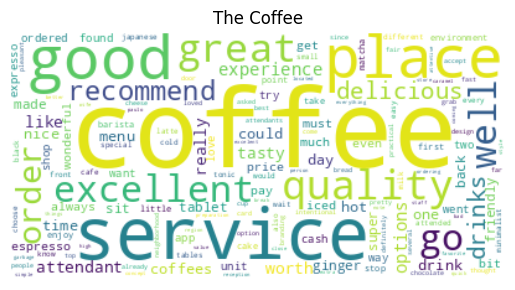

In [89]:
# Definir o nome do restaurante que você deseja analisar
restaurante = input(str('Digite o restaurante desejado: ')) #Nesse caso, peguei o restaurante com melhor polaridade

# Filtrar o DataFrame para selecionar apenas os dados do restaurante desejado
restaurante_df = freq_df[freq_df["restaurante"] == restaurante]

# Criar um dicionário com as palavras e suas frequências
palavras = dict(zip(restaurante_df["palavra"], restaurante_df["frequencia"]))

# Criar a nuvem de palavras
wordcloud = WordCloud(background_color="white").generate_from_frequencies(palavras)

# Mostrar a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(restaurante)
plt.show()

### Conclusão de frequência de palavras 

É importante lembrar que as stopwords são palavras muito comuns e genéricas que geralmente não contribuem para a análise de sentimento, mas é possível que algumas stopwords sejam importantes para a análise dependendo do contexto.
Além disso, com o resultado acima, podemos analisar que a polaridade foi calculada com base de avaliações do atendimento e de comida, devido o aparecimento das palavras "atendimento"(serviço) ,"café"(comida) e "ótimo"(pode tanto ser comentário de comida quanto de serviço).

### Wordcloud de polaridade e de frequência:
para cada restaurante colocado no input, sai o output da polaridade e das palavras com mais frequência 

Digite o restaurante desejado: The Coffee
A polaridade média dos comentários do restaurante The Coffee é 0.38 (positiva).


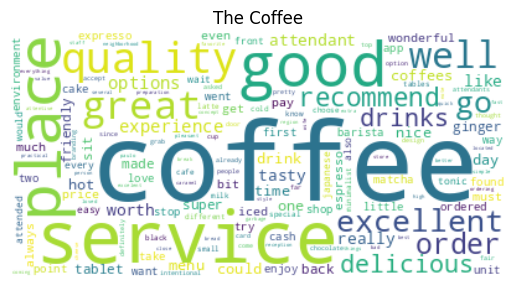

In [90]:
# Definir o nome do restaurante que você deseja analisar
restaurante = input(str('Digite o restaurante desejado: '))

# Filtrar o DataFrame para selecionar apenas os dados do restaurante desejado
restaurante_freq_df = freq_df[freq_df["restaurante"] == restaurante]
restaurante_sent_df = sent_restaurante[sent_restaurante["restaurante"] == restaurante]

# Calcular a média da polaridade dos comentários do restaurante
polaridade_media = restaurante_sent_df["polaridade"].mean()

# Exibir legenda da polaridade
if polaridade_media > 0:
    legenda_polaridade = 'positiva'
elif polaridade_media < 0:
    legenda_polaridade = 'negativa'
else:
    legenda_polaridade = 'neutra'

print(f'A polaridade média dos comentários do restaurante {restaurante} é {polaridade_media:.2f} ({legenda_polaridade}).')

# Criar um dicionário com as palavras e suas frequências
palavras = dict(zip(restaurante_freq_df["palavra"], restaurante_freq_df["frequencia"]))
wordcloud = WordCloud(background_color='white').generate_from_frequencies(palavras)

# Mostrar a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(restaurante)
plt.show()

### Verificando se nossa análise de polaridade corresponde com as notas dadas aos estabelecimentos

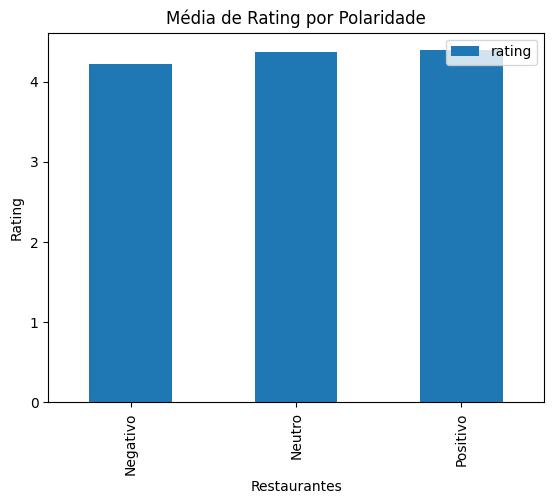

In [91]:
restaurant_sentiment = pd.read_csv('restaurant_polaridade.csv')
df = restaurant_sentiment.groupby('polaridade_texto').agg({'rating':'mean'})

# Plotar o gráfico de barras
df.plot(kind='bar')
plt.xlabel('Restaurantes')
plt.ylabel('Rating')
plt.title('Média de Rating por Polaridade')
plt.show()


Apesar da pouca variação entre as médias, a distribuição do gráfico mostra como a nossa análise de sentimentos está coerente com a realidade, visto que, comentários classificados por nós como negativos de fato apresentam a menor média de nota de avaliação (rating), já os neutros são melhores que os negativos mas ainda ficam atrás dos positivos, como esperávamos que acontecesse.

### Salvando Dados de Polaridade Média dos restaurantes

In [92]:
def summarize_text(text):
    # Transforma o texto em uma lista de frases
    sentences = text.split('. ')
    # Cria um objeto parser
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    # Gera o resumo selecionando as frases mais relevantes
    summarizer = LsaSummarizer()
    summarizer.stop_words = [' ']
    summary = summarizer(document=parser.document, sentences_count=2)

    # Retorna o resumo e as pontuações das frases
    return ' '.join(map(str, summary))

In [93]:
restaurant_polaridade_media = sentimento_df.groupby(['restaurante'], as_index=False).agg({'polaridade': 'mean', 'rating': 'mean'})
sentimento_df.fillna('', inplace=True)
restaurant_polaridade_media_comentarios = sentimento_df.groupby(['restaurante'], as_index=False)['comentario'].apply('. '.join).reset_index()
restaurant_polaridade_media_comentarios['ResumoTexto'] = restaurant_polaridade_media_comentarios['comentario'].apply(summarize_text)

/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5) is lower than number of sentences (7). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (2) is lower than number of sentences (8). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (3) is lower than number of sentences (7). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (2) is lower than number of sentences (9). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5) 

In [94]:
restaurant_polaridade_media_comentarios = restaurant_polaridade_media_comentarios[['ResumoTexto', 'restaurante']]
restaurant_polaridade_media = restaurant_polaridade_media.merge(restaurant_polaridade_media_comentarios, how='left', on ='restaurante')
restaurant_polaridade_media[['polaridade_num', 'polaridade_texto']] = restaurant_polaridade_media['polaridade'].apply(polaridade).apply(pd.Series)

In [95]:
df_rest = pd.read_csv('most_relevant_reviews.csv',sep = ',', usecols=['title', 'place_id']).drop_duplicates()

restaurant_polaridade_media = restaurant_polaridade_media.merge(df_rest, right_on='title', left_on='restaurante', how='left')
restaurant_polaridade_media = restaurant_polaridade_media[['place_id', 'title', 'rating', 'polaridade', 'polaridade_num', 'polaridade_texto', 'ResumoTexto']]
restaurant_polaridade_media.to_csv("restaurant_polaridade_media.csv", index=False)

## <b> Dashboard </b> 

O nosso principal objetivo com o dashboard é <b>aprimorar e otimizar as sugestões fornecidas pela plataforma do Google</b> (API's do Google Maps Reviews e Google Maps Place Results) para os usuários. Por meio do dashboard, o usuário pode realizar buscas específicas e utilizar todos os filtros desejados em um <i>ambiente visual dinâmico</i>.

O primeiro dashboard é direcionado para <b>buscas gerais, em que o usuário pode procurar por estabelecimentos com base em tópicos de sua preferência</b>, como zona, quantidade de avaliações, categoria e tipo de serviço. A partir dessas escolhas, são exibidas informações relevantes sobre os estabelecimentos, como a quantidade total, a média de nota e de preço.

O segundo dashboard é direcionado para ,<b>usuários que já sabem o local que desejam visitar</b>. Nesse caso, basta digitar o nome do estabelecimento para obter <b>detalhes precisos</b>, como avaliações positivas e negativas dos clientes, as palavras mais utilizadas nos comentários e informações importantes, como horários de funcionamento, categoria, zona e endereço no mapa. Além disso, são fornecidas sugestões de locais semelhantes ao pesquisado.

O grande diferencial do nosso dashboard é a <b>otimização do tempo do usuário de busca</b>. Todos os recursos foram projetados para que o usuário encontre rapidamente o que procura e possa tomar decisões informadas. O ambiente visual dinâmico, os filtros e as informações detalhadas fornecidas pelos dashboards permitem que o usuário <i>economize tempo e encontre facilmente o estabelecimento ideal</i>.

<a href="https://app.powerbi.com/groups/fc177dad-d10e-4314-ba95-1cb39b7ba54f/reports/33c3d65a-ffee-4174-b735-0a74940d7234?ctid=8eb29201-a27d-4302-8473-c982eb5be935&pbi_source=linkShare&bookmarkGuid=c7c332c1-b2e8-4b91-99b2-a9cc10219ff2">Neste link</a> você pode encontrar a versão digital do nosso Dashboard para explorar

Para que o usuário possa ter maior facilidade com o dashboard aqui trazemos um exemplo de busca aonde o usuário está procurando informações detalhadas sobre um restaurante chamado "A Creperia". Utilizando o segundo dashboard de estabelecimentos específicos, basta digitar o nome do estabelecimento na barra de pesquisa. Em seguida, serão exibidas informações detalhadas sobre o local, incluindo avaliações de clientes, horários de funcionamento, dias da semana em que o estabelecimento está aberto, a categoria a que pertence e o endereço no mapa.

É interessante observar esse caso, qual podemos notar que existe algumas avaliações que apesar de ter comentários falando bem sobre o estabelecimento, ou seja um comentário positivo, a sua avaliação é de uma estrela, isso provavelmente ocorreu porque a pessoa pode ter pensado que 1 estrela é a melhor avaliação para o restaurante, sendo assim notamos como é relevante termos um modelo que analise aém das estrelas e que olhe para as palavras nos comentários de clientes.

<a href="https://imgbox.com/9KsZl6Nq" target="_blank"><img src="https://images2.imgbox.com/16/ac/9KsZl6Nq_o.png" alt="image host"/></a>